A dataset of English. messages and text with six basic emotions: anger, fear, joy, love, sadness, and surprise.

# About the data-set

a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4).

# Text Anaysis

In [1]:
!pip install text_hammer

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.1
    Uninstalling beautifulsoup4-4.11.1:
      Successfully uninstalled beautifulsoup4-4.11.1


In [3]:
import numpy as np
import pandas as pd
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
validation = pd.read_csv('validation.csv')

In [5]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [6]:
train['description'].value_counts(normalize=True)

joy         0.335125
sadness     0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: description, dtype: float64

<AxesSubplot:xlabel='description', ylabel='count'>

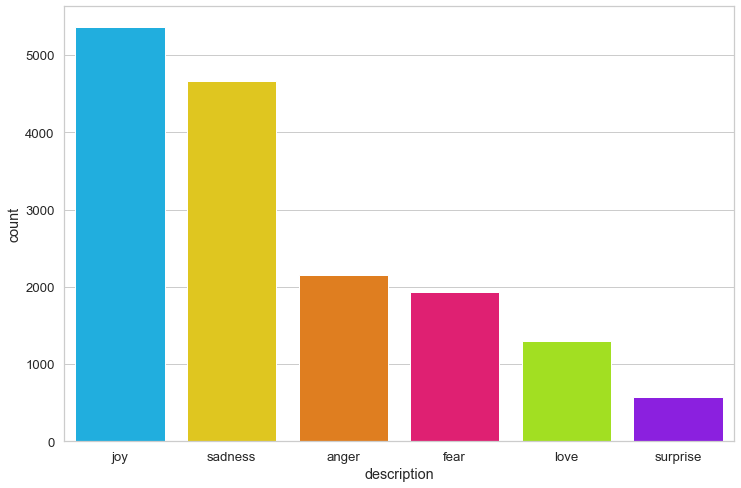

In [7]:
sns.countplot(train['description'],order = train['description'].value_counts(normalize=True).index)

In [8]:
train['text_length'] = train['text'].astype(str).apply(len)
train['text_word_count'] = train['text'].apply(lambda x: len(str(x).split()))

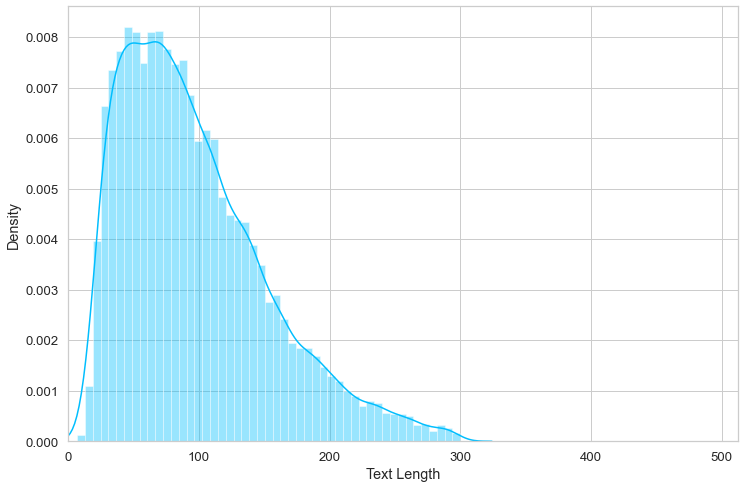

In [9]:
sns.distplot(train['text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length');

<AxesSubplot:xlabel='description', ylabel='text_word_count'>

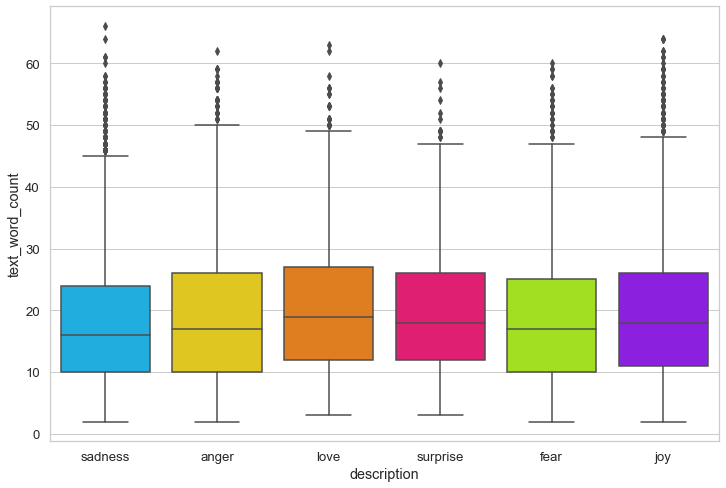

In [10]:
sns.boxplot(x="description", y="text_word_count", data=train)

In [12]:
# Creating individual dataframes of different emotions
sadness = train[train['label']==0]['text']
joy = train[train['label']==1]['text']
love = train[train['label']==2]['text']
anger = train[train['label']==3]['text']
fear = train[train['label']==4]['text']
surprise = train[train['label']==5]['text']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [14]:
sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_top_n_gram(joy.values,(1,1),7)[2:]
love_unigrams= get_top_n_gram(love.values,(1,1),7)[2:]
anger_unigrams= get_top_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]


In [15]:
sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_top_n_gram(joy.values,(2,2),7)[2:]
love_bigrams= get_top_n_gram(love.values,(2,2),7)[2:]
anger_bigrams= get_top_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]

In [16]:
sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_top_n_gram(joy.values,(3,3),7)[2:]
love_trigrams= get_top_n_gram(love.values,(3,3),7)[2:]
anger_trigrams= get_top_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]

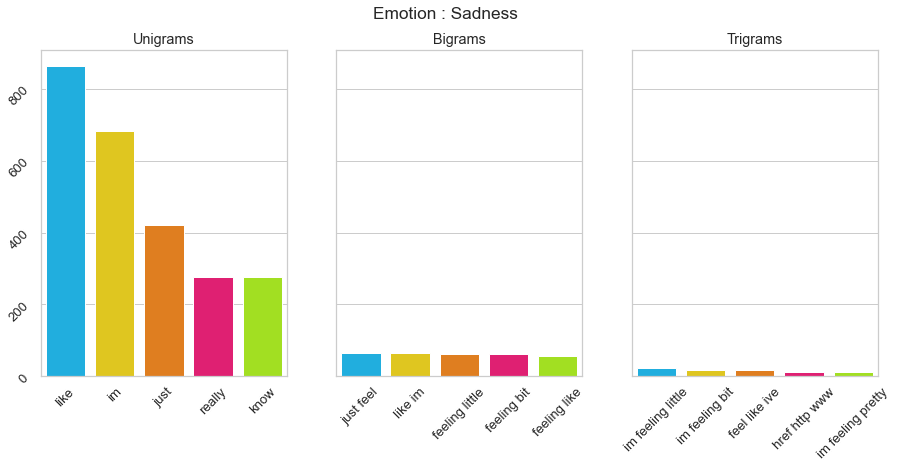

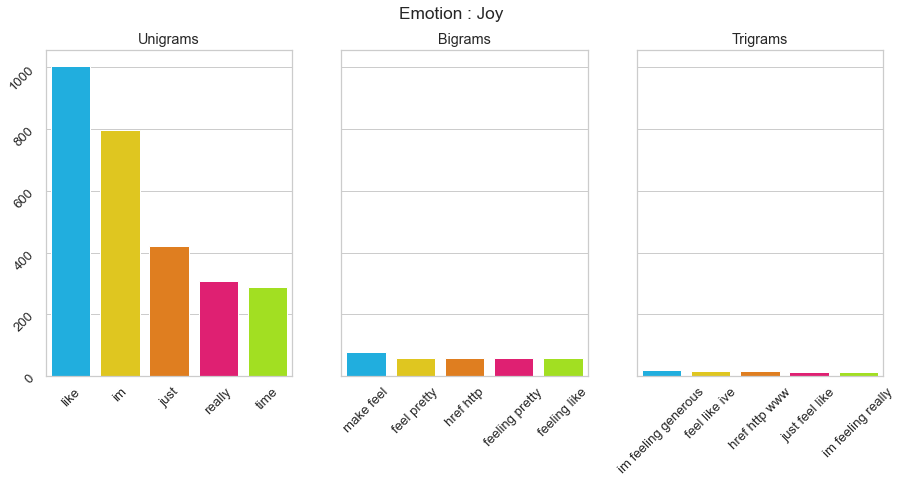

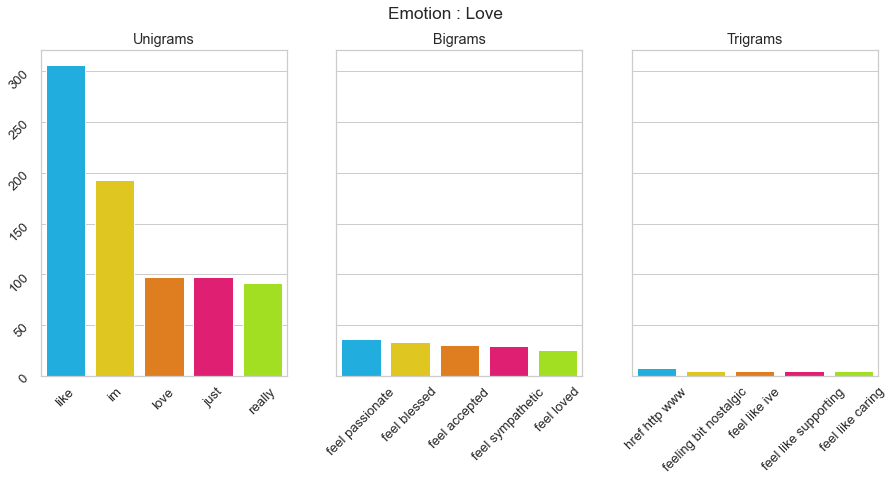

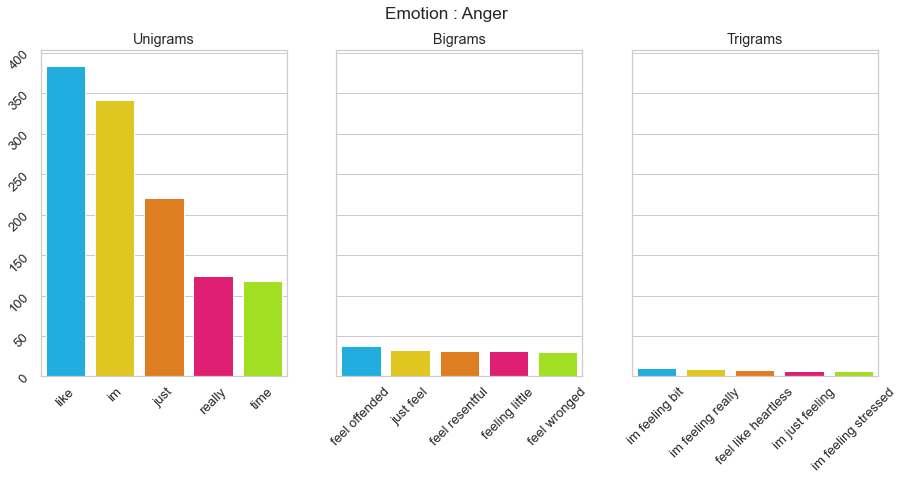

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Sadness')



sns.barplot( list(dict(sad_unigrams).keys()), list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)



sns.barplot( list(dict(sad_bigrams).keys()), list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(sad_trigrams).keys()), list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('sadness.png')


#Joy

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Joy')

sns.barplot( list(dict(joy_unigrams).keys()), list(dict(joy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(joy_bigrams).keys()), list(dict(joy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot( list(dict(joy_trigrams).keys()), list(dict(joy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('joy.png')

#Love

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Love')

sns.barplot( list(dict(love_unigrams).keys()), list(dict(love_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(love_bigrams).keys()), list(dict(love_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(love_trigrams).keys()), list(dict(love_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Anger
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Anger')

sns.barplot( list(dict(anger_unigrams).keys()), list(dict(anger_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(anger_bigrams).keys()), list(dict(anger_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(anger_trigrams).keys()), list(dict(anger_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
